## Дерево решений и случайный лес

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Для начала нам нужно определить оптимальную глубину дерева. Нам важны результаты по тестовой выборке, поэтому выбираем max_leaf_nodes=8.

In [3]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

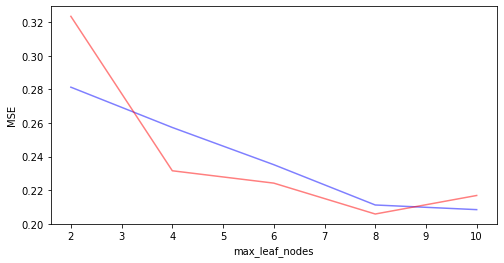

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

Строим соответствующее дерево. Видим, что его качество даже выше метода k-ближайших соседей.

In [5]:
ct = DecisionTreeClassifier(max_leaf_nodes = 8, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [6]:
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.7977941176470589

Посмотрим на матрицу сопряженности. Видим, что модель 217 объектов распознала верно и 55 нет. Точность модели: 79,7%. Доля ошибок: 20,3%.

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 46  35]
 [ 20 171]]


Для построение случайного леса необходимо определиться с оптимальным количеством деревьев. ВОзьмём его равным 20.

In [8]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

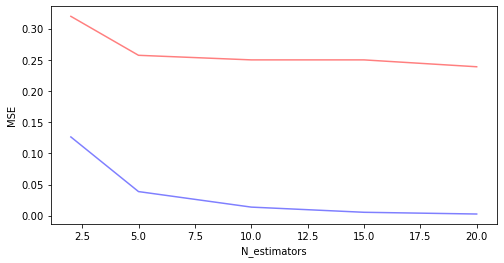

In [9]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

Теперь определим глубину дерева (как мы это делали с деревом решений). Оптимальная глубина = 4.

In [10]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

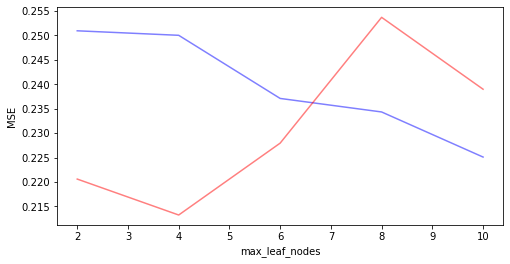

In [11]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

Строим модель с полученными параметрами. Получили хороший результат, который немножечко хуже случайного леса.

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, max_leaf_nodes = 4, random_state = 10).fit(X_train, y_train)

In [13]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test)

0.7904411764705882

Посмотрим на матрицу сопряженности. Видим, что модель 214 объектов распознала верно и 58 нет. Точность модели: 78,6%. Доля ошибок: 21,4%.

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 30  51]
 [  6 185]]


## Наилучшим классификатором пока является дерево решений, которое определяет доход университета с точность 79,7%. Да, модель случайного леса почти такая же по качеству, но она гораздо сложнее, поэтому я не вижу смысла отдавать предпочтение именно ей. 